In [ ]:
## Long Short Term Memory (LSTM) Recurrent Neural Network (RNN)
## This video was guided by the following tutorial: https://www.youtube.com/watch?v=QIUxPv5PJOY

## This program considers the past 60 day stock price for predictoions.

In [ ]:
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.4 MB/s 
     |████████████████████████████████| 128 kB 10.2 MB/s 
     |████████████████████████████████| 62 kB 855 kB/s 
     |████████████████████████████████| 4.1 MB 35.5 MB/s 
     |████████████████████████████████| 110 kB 39.7 MB/s 
     |████████████████████████████████| 112 kB 41.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found

In [ ]:
# Importing relevant libraries

import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Retrieve stock quotes

import yfinance as yf
yf.pdr_override() 

df = web.get_data_yahoo('^GSPC', start='2012-01-01', end='2019-12-17')

# Display data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000
...,...,...,...,...,...,...
2019-12-10,3135.360107,3142.120117,3126.090088,3132.520020,3132.520020,3346310000
2019-12-11,3135.750000,3143.979980,3133.209961,3141.629883,3141.629883,3257650000
2019-12-12,3141.229980,3176.280029,3138.469971,3168.570068,3168.570068,4003200000


In [ ]:
# Retrieve matrix dimensions

df.shape

(2002, 6)

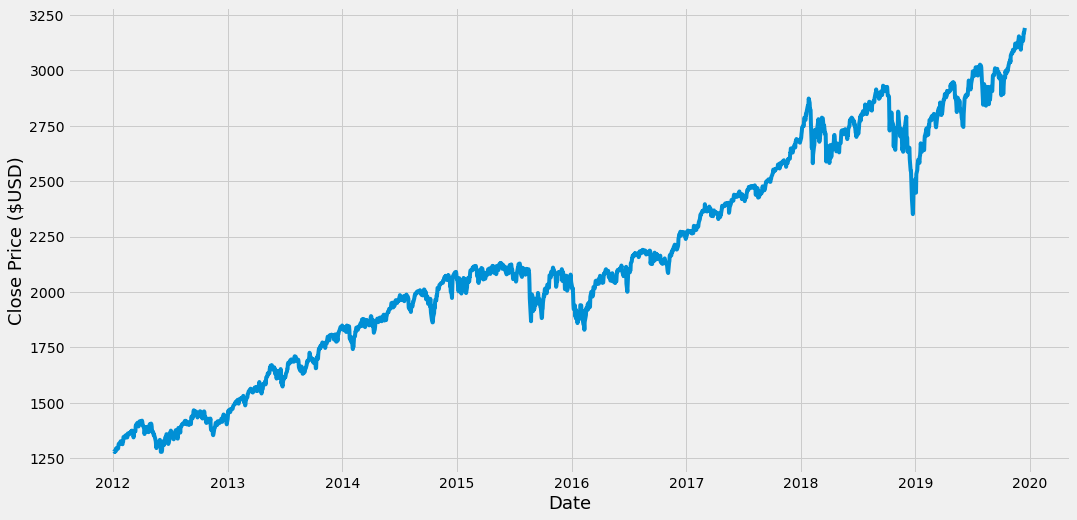

In [ ]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title='Close Price History'
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($USD)', fontsize=18)

plt.show()

In [ ]:
# Create a new dataframe with only closing prices

data = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = data.values

# Compute row count to train the model on => 80% of data for training
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

1602


In [ ]:
# Scale the data for preprocessing

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)   # Computes min and max values for scaling, then transforms. Standardizes data from 0 to 1 inclusive

scaled_data

array([[0.00000000e+00],
       [1.25361211e-04],
       [2.08943853e-03],
       ...,
       [9.88048473e-01],
       [9.88168605e-01],
       [1.00000000e+00]])

In [ ]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   # Positions 0 to 59
  y_train.append(train_data[i, 0])        # Position 60
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.        , 0.00012536, 0.00208944, 0.00039177, 0.00190133,
       0.00784579, 0.00805474, 0.00963228, 0.00628394, 0.00867639,
       0.01618269, 0.01955711, 0.02001679, 0.02034065, 0.01963548,
       0.02559562, 0.02161002, 0.02051301, 0.0187788 , 0.0184654 ,
       0.02456653, 0.02532398, 0.03543686, 0.03513908, 0.03655995,
       0.03807997, 0.03911946, 0.03425632, 0.03902547, 0.03836206,
       0.0345645 , 0.04230067, 0.04396697, 0.04447887, 0.04210217,
       0.04513182, 0.04632282, 0.04728917, 0.04968685, 0.04629151,
       0.05068451, 0.0483548 , 0.04558627, 0.03463241, 0.03947469,
       0.04641164, 0.04900252, 0.04911743, 0.06210328, 0.06123098,
       0.06557698, 0.06639713, 0.06931187, 0.0671023 , 0.06572849,
       0.06044744, 0.06270924, 0.07284303, 0.07075882, 0.06711276])]
[0.06593221746127353]

[array([0.        , 0.00012536, 0.00208944, 0.00039177, 0.00190133,
       0.00784579, 0.00805474, 0.00963228, 0.00628394, 0.00867639,
       0.01618269, 0.01955711, 0.02

In [ ]:
# Convert x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the x_train data set => Add third column

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [ ]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 68s 39ms/step - loss: 0.0013


In [ ]:
# Create the testing data set

# Array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
# Convert the data to a numpy array

x_test = np.array(x_test)


In [ ]:
# Reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Num of rows, num of columns, num of features (just the close price)


In [ ]:
# Retrieve model's predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)   # Unscale predictions to compare to original closing prices (y_test)



13/13 [==============================] - 1s 21ms/step


In [ ]:
# Evaluate root mean square error (RMSE) => Standard deviation of the residuals

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
print(rmse)

120.47076354980469


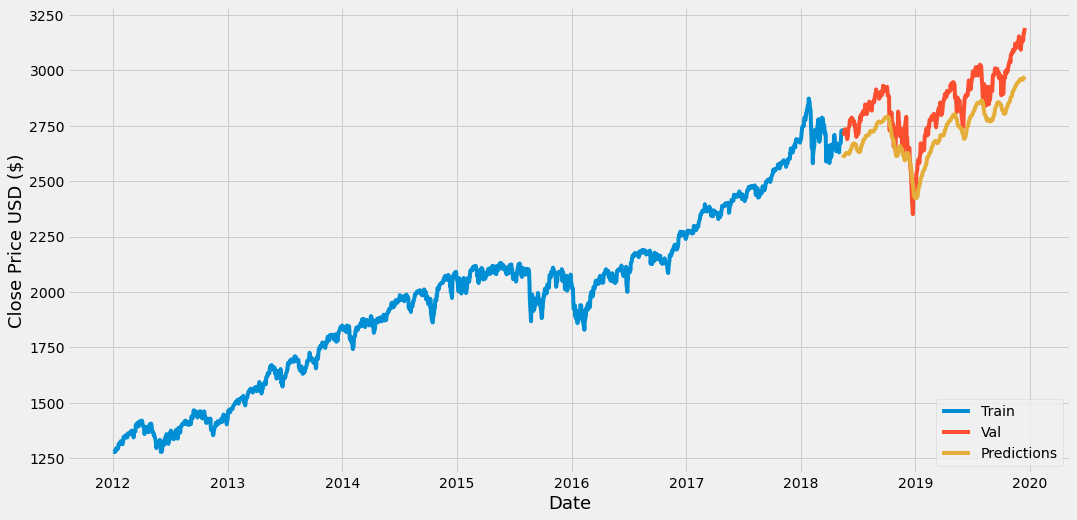

In [ ]:
# Plot the data

train = data[:training_data_len].copy()  
valid = data[training_data_len:].copy()  

valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title='Model'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Display valid and predicted prices

valid

,Close,Predictions
Date,,
2018-05-16,2722.459961,2605.003174
2018-05-17,2720.129883,2610.315674
2018-05-18,2712.969971,2614.418213
2018-05-21,2733.010010,2616.941162
2018-05-22,2724.439941,2619.925293
...,...,...
2019-12-10,3132.520020,2959.516113
2019-12-11,3141.629883,2961.076416
2019-12-12,3168.570068,2963.158447


In [ ]:
# Predict closing price for ^GSPC stock on december 18, 2019

#.Retrieve actual quote
apple_quote=web.get_data_yahoo('^GSPC', start='2012-01-01', end='2019-12-17')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Retrieve only last 60 days of data and convert to array
last_sixty_days = new_df[-60:].values

# Scale the data to [0:1]
last_sixty_days_scaled = scaler.transform(last_sixty_days)

# Initialize list
new_x_test = []
new_x_test.append(last_sixty_days_scaled)

# Convert to numpy array
new_x_test = np.array(new_x_test)

# Reshape
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))

# Calculate predictions
pred_price = model.predict(new_x_test)

# Rescale predictions 
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 26ms/step
[[2978.6692]]


In [ ]:
# Evaluate efficacy of model

# Retrieve actual future quote data
actual_apple_quote=web.get_data_yahoo('^GSPC', start='2019-12-18', end='2019-12-19')
print(actual_apple_quote['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    3191.139893
Name: Close, dtype: float64
